# 1. Initial Setup and Re-Loading the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plotting style for better visuals
sns.set_style('whitegrid')

In [3]:
import os
os.getcwd()

'C:\\Users\\ssaja\\OneDrive\\Desktop\\Courses_Projects\\Projects\\ecommerce-customer-analysis\\notebooks'

In [4]:
# Load the data from the RAW folder
df = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name = 'Year 2010-2011')

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Create a copy of the dataframe to preserve the original data
df_clean = df.copy()

In [7]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Check the basic info again
print("Initial Shape:", df_clean.shape)
df_clean.info()

Initial Shape: (541910, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. Data Cleaning & Preprocessing

### 2.1 Handling Missing Values

The `info()` method reveals missing values in the `CustomerID` and `Description` columns.

- **CustomerID:** This is a critical field for our customer segmentation analysis. Rows without a valid `CustomerID` cannot be attributed to any customer and are therefore useless for our goal. **Action: These rows will be dropped.**
- **Description:** While less critical, missing descriptions could indicate data entry errors. There are only a few hundred rows affected out of over 500,000. **Action: These rows will also be dropped to maintain a clean dataset.** An alternative would be to investigate by `StockCode` or fill with 'UNKNOWN', but removal is simpler for this analysis.

In [9]:
# Document the number of missing values before action
print("Missing Values Before Handling:")
print(df_clean.isnull().sum())

Missing Values Before Handling:
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [10]:
# check whether the rows with missing Description are the same ones with missing Customer ID:

# Rows where Description is missing
missing_description = df_clean['Description'].isnull().sum()

# Rows where Customer ID is missing
missing_customer = df_clean['Customer ID'].isnull().sum()

# Rows where BOTH Description and Customer ID are missing
# .shape : Every Pandas DataFrame has a .shape attribute → returns a tuple (rows, columns).
# Example: (100, 8) means 100 rows and 8 columns.
# .shape[0] : [0] means we take only the number of rows.

missing_both = df_clean[df_clean['Description'].isnull() & df_clean['Customer ID'].isnull()].shape[0]

print("Missing Description:", missing_description)
print("Missing Customer ID:", missing_customer)
print("Missing Both:", missing_both)

Missing Description: 1454
Missing Customer ID: 135080
Missing Both: 1454


In [11]:
# 1. Drop rows where CustomerID is null
# JUSTIFICATION: These transactions cannot be attributed to a customer,
# making them useless for customer segmentation analysis.
df_clean = df_clean.dropna(subset=['Customer ID'])

In [12]:
df_clean.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
missing_descriptions = df_clean[df_clean['Description'].isnull()]

In [14]:
missing_descriptions

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [15]:
# 2. For missing Description, let's see the corresponding StockCode
# This is investigative. We might find the same StockCode has a description elsewhere.
missing_descriptions = df_clean[df_clean['Description'].isnull()]
print(f"\nRows with missing Description: {len(missing_descriptions)}")


Rows with missing Description: 0


In [16]:
# If it's a small number, it's safer to drop them to avoid errors in analysis.
# JUSTIFICATION: A small number of rows with critical missing information can be removed to maintain data integrity.

df_clean = df_clean.dropna(subset=['Description'])

In [17]:
# Alternatively, you could fill them with a placeholder like 'Unknown'
# df_clean['Description'].fillna('UNKNOWN', inplace=True)

# Document the number of missing values after action
print("\nMissing Values After Handling:")
print(df_clean.isnull().sum())


Missing Values After Handling:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


### 2.2 Correcting Data Types

The initial data inspection shows that the 'InvoiceDate' is stored as an object (string) instead of a datetime.
The InvoiceDate is likely read as a string (object). We need it as a datetime object to perform time-based analysis.

. **InvoiceDate:** This field must be a datetime object to perform time-based analysis and calculate the Recency component of RFM (Recency - refers to how recently a customer made a purchase, Frequency, Monetary). **Action: The column will be converted to a datetime type using 'pd.to_datetime()'.** This enables proper sorting, filtering, and date operations.

In [18]:
# Convert InvoiceDate to datetime
# JUSTIFICATION: To enable time-series analysis and calculate recency.
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [19]:
# Verify the change
print("\nInvoiceDate dtype after conversion:", df_clean['InvoiceDate'].dtype)


InvoiceDate dtype after conversion: datetime64[ns]


### 2.3 Handling Duplicates

The dataset contains a number of rows that are complete duplicates across all columns.

**Duplicate Rows:** These entries likely represent data extraction errors and would skew summary statistics like total sales and order frequency. **Action: All duplicate rows will be identified and removed.** This ensures each transaction is only counted once for an accurate view of customer behavior.

In [20]:
# Check for full duplicate rows
duplicate_rows = df_clean.duplicated().sum()
print(f"Number of fully duplicate rows: {duplicate_rows}")

Number of fully duplicate rows: 5225


In [21]:
# Remove duplicates
# JUSTIFICATION: Duplicate entries skew summary statistics and analysis.
df_clean = df_clean.drop_duplicates()

In [22]:
print(f"Shape after removing duplicates: {df_clean.shape}")

Shape after removing duplicates: (401605, 8)


### 2.4 Filtering Invalid Transactions
This dataset is famous for having negative quantities and prices. These represent canceled orders or refunds. For an RFM analysis focused on purchasing behavior, we typically want to exclude cancellations.
The descriptive statistics show negative values in the 'Quantity' and 'UnitPrice' columns.

**Negative Quantities and Prices:** These values represent canceled orders, returns, or system adjustments, not actual purchases. **Action: Rows where 'Quantity' is less than or equal to 0 will be removed. Rows where 'UnitPrice' is less than or equal to 0 will also be removed.** This filters out non-purchase transactions to focus the analysis on genuine purchasing behavior.

In [23]:
# Inspect the descriptive statistics - you will see negative min values for Quantity
print(df_clean.describe())

            Quantity                    InvoiceDate          Price  \
count  401605.000000                         401605  401605.000000   
mean       12.183245  2011-07-10 12:08:56.555570944       3.474100   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 12:00:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.282726                            NaN      69.763952   

         Customer ID  
count  401605.000000  
mean    15281.154341  
min     12346.000000  
25%     13939.000000  
50%     15145.000000  
75%     16784.000000  
max     18287.000000  
std      1714.008869  


In [24]:
# Filter out rows where Quantity is less than or equal to 0
# JUSTIFICATION: Negative quantities represent canceled orders or returns,
# which are not representative of purchasing behavior for segmentation.

print(f"Shape before removing cancellations: {df_clean.shape}")

Shape before removing cancellations: (401605, 8)


In [25]:
df_clean['Quantity'] > 0

0         True
1         True
2         True
3         True
4         True
          ... 
541905    True
541906    True
541907    True
541908    True
541909    True
Name: Quantity, Length: 401605, dtype: bool

In [26]:
# Using the Boolean series from the previous step, this expression selects only the rows where the condition df_clean['Quantity'] > 0 is True.
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"Shape after removing cancellations : {df_clean.shape}")

Shape after removing cancellations : (392733, 8)


In [27]:
# Filter out rows where UnitPrice is less than or equal to 0
# JUSTIFICATION: Prices must be positive for valid transactions.

df_clean = df_clean[df_clean['Price'] > 0]

In [28]:
df_clean.shape

(392693, 8)

### 2.5 Managing Outliers
A boxplot of the 'Quantity' column reveals extreme outliers that could distort the analysis.

**Extreme Order Quantities:** A very small number of orders have abnormally high quantities. These could be valid wholesale orders or data errors. **Action: Values above the 99th percentile will be capped at that threshold.** This approach reduces the undue influence of extreme points on the analysis while preserving the customer data.

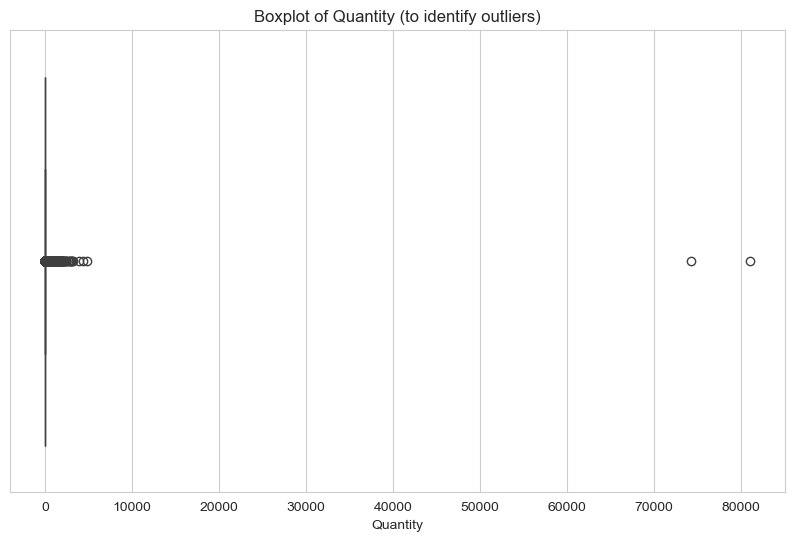

In [29]:
# Handle extreme outliers (optional but good practice)
# For example, a very small number of orders might have an incredibly high Quantity.
# We can use the Interquartile Range (IQR) method to identify them visually or filter them.

plt.figure(figsize = (10,6))
sns.boxplot(data=df_clean, x='Quantity')
plt.title('Boxplot of Quantity (to identify outliers)')
plt.show()

In [30]:
# You might decide to cap extreme values instead of removing them to keep the data intact.
# for example, cap Quantity at the 99th percentile.
q99 = df_clean['Quantity'].quantile(0.99)
df_clean = df_clean[df_clean['Quantity'] < q99]

### 2.6 Standardizing Values
A value count of the 'Country' column shows multiple entries for the same country (e.g., 'EIRE').

**Country Names:** Inconsistent country names would lead to incorrect geographic analysis. **Action: The Country column will be standardized by replacing known variants (e.g., 'EIRE' will be replaced with 'Ireland').** This ensures correct grouping and analysis by customer location.


In [31]:
# Check Country names - there might be typos or multiple entries for the same country (e.g., 'USA', 'U.S.A')
print(df_clean['Country'].value_counts())

# In this dataset, 'United Kingdom' is the main country. We might see 'EIRE' which is Ireland.
# For this project, we can leave them as-is for country-based analysis, or group if necessary.
# Example: Standardize 'EIRE' to 'Ireland'
df_clean['Country'] = df_clean['Country'].replace({'EIRE': 'Ireland'})

# Standardize text in Description (remove extra spaces, convert to uppercase/lowercase)
# JUSTIFICATION: Ensures the same product is not listed multiple times due to case differences.
df_clean['Description'] = df_clean['Description'].str.strip().str.upper()

Country
United Kingdom          346054
Germany                   8976
France                    8276
EIRE                      7018
Spain                     2460
Belgium                   2025
Switzerland               1832
Netherlands               1801
Portugal                  1448
Norway                    1060
Australia                  930
Italy                      756
Channel Islands            742
Finland                    674
Cyprus                     600
Austria                    394
Denmark                    374
Sweden                     341
Poland                     330
Japan                      294
Israel                     245
Unspecified                241
Singapore                  221
Iceland                    181
USA                        179
Canada                     149
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


### 2.7 Final Output
After the cleaning process is complete, the dataset will be saved to a new file.

**Processed Dataset:** The final cleaned dataset is now ready for analysis. **Action: The cleaned DataFrame will be saved to 'data/processed/online_retail_ii_cleaned.csv.'** This preserves the original raw data and provides a clear, analysis-ready dataset for the next steps.


In [33]:
# Final inspection
print("Final Shape:", df_clean.shape)
print("\nFinal Info:")
df_clean.info()
print("\nSample of processed data:")
df_clean.head()

# Save the cleaned dataframe to a new CSV in the 'processed' folder
# This creates a clear, analysis-ready dataset for the next steps.
df_clean.to_csv('../data/processed/online_retail_ii_cleaned.csv', index=False)

print("\nCleaned data saved to 'data/processed/online_retail_ii_cleaned.csv'")

Final Shape: (388206, 8)

Final Info:
<class 'pandas.core.frame.DataFrame'>
Index: 388206 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      388206 non-null  object        
 1   StockCode    388206 non-null  object        
 2   Description  388206 non-null  object        
 3   Quantity     388206 non-null  int64         
 4   InvoiceDate  388206 non-null  datetime64[ns]
 5   Price        388206 non-null  float64       
 6   Customer ID  388206 non-null  float64       
 7   Country      388206 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.7+ MB

Sample of processed data:

Cleaned data saved to 'data/processed/online_retail_ii_cleaned.csv'
